In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rc('font', family="Cambria")

#! 根据模型修改
# ppi, ppi-woppm, rnn, rnn-woppm
model_name = "rnn-woppm"

In [2]:
results_dir = f"./results/{model_name}"
values = []
errors = []
layers_num = len(os.listdir(results_dir))
for fn in ['emb'] + list(range(layers_num-1)):
    lines = open(os.path.join(results_dir, f"{str(fn)}"+".eval"), "r").readlines()
    for line in lines:
        avg, std, _min, _max = line.strip().split()
        values.append(float(avg))
        errors.append(float(std))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


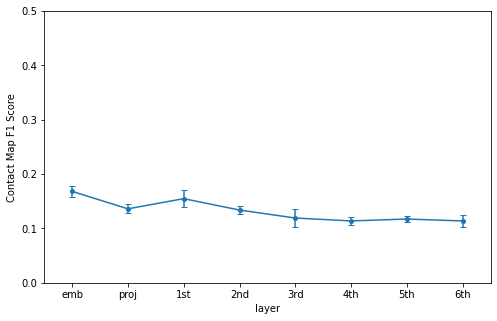

In [3]:
# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(8, 5))
fig = plt.subplot()

xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]
colors = ["#407088", "#a37eba"]

xs = xs[:layers_num]
xticks = xticks[:layers_num]
xlim = layers_num + 0.5

fig.set_xlim(0.5, xlim, 1)
fig.set_ylim(0, 0.5)
fig.set_xlabel("layer")
fig.set_ylabel("Contact Map F1 Score")
fig.set_xticks(range(1, layers_num+1), xticks)

fig.errorbar(xs, values, yerr=errors, capsize=3, marker="o", ms=4)

fig.legend(frameon=False)
    
plt.savefig(f"./figure-{model_name}.pdf", bbox_inches='tight')